# Analyzing Physical Activity Monitoring Data

### Data obtain [here](https://archive.ics.uci.edu/ml/datasets/PAMAP2+Physical+Activity+Monitoring).

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
custom_style = {
            'grid.color': '0.8',
            'grid.linestyle': '--',
            'grid.linewidth': 0.5,
}
sns.set_style(custom_style)

In [11]:
columns = ['timestamp', 'activity_id', 'heart_rate',
           'IMU_HAND_TEMP_C',
           'IMU_HAND_16G_2',
           'IMU_HAND_16G_3',
           'IMU_HAND_16G_4',
           'IMU_HAND_6G_5',
           'IMU_HAND_6G_6',
           'IMU_HAND_6G_7',
           'IMU_HAND_GYRO_8',
           'IMU_HAND_GYRO_9',
           'IMU_HAND_GYRO_10',
           'IMU_HAND_MAG_11',
           'IMU_HAND_MAG_12',
           'IMU_HAND_MAG_13',
           'IMU_HAND_ORIENT_14',
           'IMU_HAND_ORIENT_15',
           'IMU_HAND_ORIENT_16',
           'IMU_HAND_ORIENT_17',
           'IMU_CHEST_TEMP_C',
           'IMU_CHEST_16G_2',
           'IMU_CHEST_16G_3',
           'IMU_CHEST_16G_4',
           'IMU_CHEST_6G_5',
           'IMU_CHEST_6G_6',
           'IMU_CHEST_6G_7',
           'IMU_CHEST_GYRO_8',
           'IMU_CHEST_GYRO_9',
           'IMU_CHEST_GYRO_10',
           'IMU_CHEST_MAG_11',
           'IMU_CHEST_MAG_12',
           'IMU_CHEST_MAG_13',
           'IMU_CHEST_ORIENT_14',
           'IMU_CHEST_ORIENT_15',
           'IMU_CHEST_ORIENT_16',
           'IMU_CHEST_ORIENT_17',
           'IMU_ANKLE_TEMP_C',
           'IMU_ANKLE_16G_2',
           'IMU_ANKLE_16G_3',
           'IMU_ANKLE_16G_4',
           'IMU_ANKLE_6G_5',
           'IMU_ANKLE_6G_6',
           'IMU_ANKLE_6G_7',
           'IMU_ANKLE_GYRO_8',
           'IMU_ANKLE_GYRO_9',
           'IMU_ANKLE_GYRO_10',
           'IMU_ANKLE_MAG_11',
           'IMU_ANKLE_MAG_12',
           'IMU_ANKLE_MAG_13',
           'IMU_ANKLE_ORIENT_14',
           'IMU_ANKLE_ORIENT_15',
           'IMU_ANKLE_ORIENT_16',
           'IMU_ANKLE_ORIENT_17']

In [25]:
df = pd.read_csv('/home/pybokeh/Downloads/PAMAP2_Dataset/Protocol/subject101.dat', sep=' ', 
                 header=None, names=columns).query("activity_id != 0")

In [26]:
df.head()

,timestamp,activity_id,heart_rate,IMU_HAND_TEMP_C,IMU_HAND_16G_2,IMU_HAND_16G_3,IMU_HAND_16G_4,IMU_HAND_6G_5,IMU_HAND_6G_6,IMU_HAND_6G_7,...,IMU_ANKLE_GYRO_8,IMU_ANKLE_GYRO_9,IMU_ANKLE_GYRO_10,IMU_ANKLE_MAG_11,IMU_ANKLE_MAG_12,IMU_ANKLE_MAG_13,IMU_ANKLE_ORIENT_14,IMU_ANKLE_ORIENT_15,IMU_ANKLE_ORIENT_16,IMU_ANKLE_ORIENT_17
2928,37.66,1,NaN,30.375,2.21530,8.27915,5.58753,2.24689,8.55387,5.77143,...,0.002908,-0.027714,0.001752,-61.1081,-36.8636,-58.3696,1.0,0.0,0.0,0.0
2929,37.67,1,NaN,30.375,2.29196,7.67288,5.74467,2.27373,8.14592,5.78739,...,0.020882,0.000945,0.006007,-60.8916,-36.3197,-58.3656,1.0,0.0,0.0,0.0
2930,37.68,1,NaN,30.375,2.29090,7.14240,5.82342,2.26966,7.66268,5.78846,...,-0.035392,-0.052422,-0.004882,-60.3407,-35.7842,-58.6119,1.0,0.0,0.0,0.0
2931,37.69,1,NaN,30.375,2.21800,7.14365,5.89930,2.22177,7.25535,5.88000,...,-0.032514,-0.018844,0.026950,-60.7646,-37.1028,-57.8799,1.0,0.0,0.0,0.0
2932,37.70,1,100.0,30.375,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,...,0.001351,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847,1.0,0.0,0.0,0.0


Let's make a column called "activity" from the activity id to make it easier to summarize our data.

In [31]:
id_to_activity = {0: 'other',
                  1: 'lying',
                  2: 'sitting',
                  3: 'standing',
                  4: 'walking',
                  5: 'running',
                  6: 'cycling',
                  7: 'Nordic walking',
                  9: 'watching TV',
                  10: 'computer work',
                  11: 'car driving',
                  12: 'ascending stairs',
                  13: 'descending stairs',
                  16: 'vacuum cleaning',
                  17: 'ironing',
                  18: 'folding laundry',
                  19: 'house cleaning',
                  20: 'playing soccer',
                  24: 'rope jumping'}

In [32]:
df['activity'] = df.activity_id.map(id_to_activity)

In [33]:
df.head()

,timestamp,activity_id,heart_rate,IMU_HAND_TEMP_C,IMU_HAND_16G_2,IMU_HAND_16G_3,IMU_HAND_16G_4,IMU_HAND_6G_5,IMU_HAND_6G_6,IMU_HAND_6G_7,...,IMU_ANKLE_GYRO_9,IMU_ANKLE_GYRO_10,IMU_ANKLE_MAG_11,IMU_ANKLE_MAG_12,IMU_ANKLE_MAG_13,IMU_ANKLE_ORIENT_14,IMU_ANKLE_ORIENT_15,IMU_ANKLE_ORIENT_16,IMU_ANKLE_ORIENT_17,activity
2928,37.66,1,NaN,30.375,2.21530,8.27915,5.58753,2.24689,8.55387,5.77143,...,-0.027714,0.001752,-61.1081,-36.8636,-58.3696,1.0,0.0,0.0,0.0,lying
2929,37.67,1,NaN,30.375,2.29196,7.67288,5.74467,2.27373,8.14592,5.78739,...,0.000945,0.006007,-60.8916,-36.3197,-58.3656,1.0,0.0,0.0,0.0,lying
2930,37.68,1,NaN,30.375,2.29090,7.14240,5.82342,2.26966,7.66268,5.78846,...,-0.052422,-0.004882,-60.3407,-35.7842,-58.6119,1.0,0.0,0.0,0.0,lying
2931,37.69,1,NaN,30.375,2.21800,7.14365,5.89930,2.22177,7.25535,5.88000,...,-0.018844,0.026950,-60.7646,-37.1028,-57.8799,1.0,0.0,0.0,0.0,lying
2932,37.70,1,100.0,30.375,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,...,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847,1.0,0.0,0.0,0.0,lying


The web site did warn us there would be missing/NaN values.  So let's see which colummns contain missing data:

In [36]:
df.isnull().any()

timestamp              False
activity_id            False
heart_rate              True
IMU_HAND_TEMP_C         True
IMU_HAND_16G_2          True
IMU_HAND_16G_3          True
IMU_HAND_16G_4          True
IMU_HAND_6G_5           True
IMU_HAND_6G_6           True
IMU_HAND_6G_7           True
IMU_HAND_GYRO_8         True
IMU_HAND_GYRO_9         True
IMU_HAND_GYRO_10        True
IMU_HAND_MAG_11         True
IMU_HAND_MAG_12         True
IMU_HAND_MAG_13         True
IMU_HAND_ORIENT_14      True
IMU_HAND_ORIENT_15      True
IMU_HAND_ORIENT_16      True
IMU_HAND_ORIENT_17      True
IMU_CHEST_TEMP_C        True
IMU_CHEST_16G_2         True
IMU_CHEST_16G_3         True
IMU_CHEST_16G_4         True
IMU_CHEST_6G_5          True
IMU_CHEST_6G_6          True
IMU_CHEST_6G_7          True
IMU_CHEST_GYRO_8        True
IMU_CHEST_GYRO_9        True
IMU_CHEST_GYRO_10       True
IMU_CHEST_MAG_11        True
IMU_CHEST_MAG_12        True
IMU_CHEST_MAG_13        True
IMU_CHEST_ORIENT_14     True
IMU_CHEST_ORIE

In [37]:
df.shape

(249957, 55)

Let's drop all rows with missing data:

In [40]:
df.dropna(inplace=True)
df.shape

(22590, 55)

As a sanity check, let's see if our data is "correct" or makes sense.  Let's make a boxplot of the heart rate by activity:

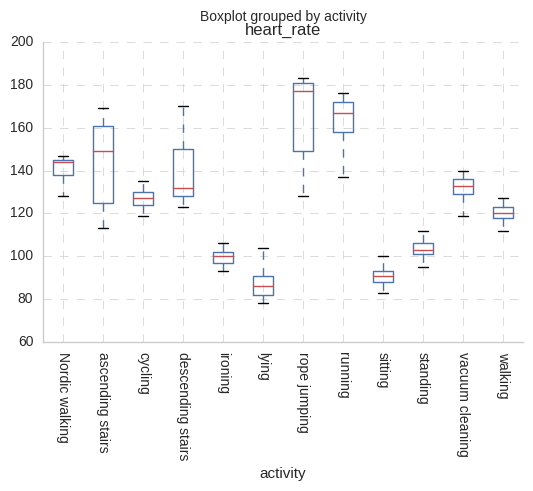

In [69]:
df.boxplot(column='heart_rate', by='activity')
plt.xticks(rotation=-90)
sns.despine()
plt.show()

It appears are data is correct since it makes sense that the heart rate is lowest with an activity such as lying down and higher with more strenuous activity such as running or rope jumping.

In [92]:
df[['timestamp', 'heart_rate', 'activity']].query("activity == 'running'").describe()

,timestamp,heart_rate
count,1895.000000,1895.000000
mean,3242.268100,161.387335
std,61.494163,14.711332
min,3135.800000,124.000000
25%,3189.025000,158.000000
50%,3241.580000,167.000000
75%,3295.710000,172.000000
max,3348.380000,176.000000


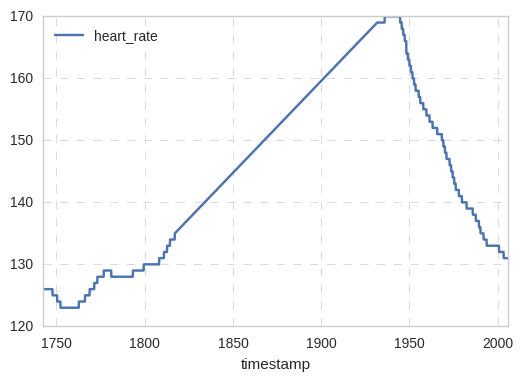

In [103]:
df.query("activity == 'descending stairs'").plot.line(x="timestamp", y="heart_rate")